In [23]:
import torch
import torch.optim as optim
from pathlib import Path
from models import Generater_MLP_Skip, PatchMLPDiscriminator_1D_Res
from data_PET import read_data, get_data_loaders
import os
(
    uPiB,
    uFBP,
    pPiB,
    pFBP,
    uPiB_CL,
    uFBP_CL,
    pPiB_CL,
    pFBP_CL,
    uPiB_scaler,
    uFBP_scaler,
    pWeight,
    uWeight,
    features,
    uFBP_DM_AGE, uPiB_DM_AGE, uFBP_DM_SEX, uPiB_DM_SEX, p_DM_AGE, p_DM_SEX
) = read_data(normalize=False, adding_CL=True, adding_DM=False, ret_feat=True)

# all to csv
# import pandas as pd
# import numpy as np
# uPiB.to_csv("./data_csv/uPiB.csv")
# uFBP.to_csv("./data_csv/uFBP.csv")
# pPiB.to_csv("./data_csv/pPiB.csv")
# pFBP.to_csv("./data_csv/pFBP.csv")

path = '/data/amciilab/yiming/PET_cycleGAN'

paired_test, paired_val, unpaired_loader = get_data_loaders(
    uPiB,
    uFBP,
    pPiB,
    pFBP,
    uPiB_CL,
    uFBP_CL,
    pWeight,
    uWeight,
    batch_size_u=10,
    resample=False,
    shuffle=True,
)

## BASE
# Gen_size = 200
# Gen_dep = 4
# Dis_size = 220
# Dis_dep = 5
# feat_size = 85
# model_folder = Path(
#     os.path.join(path, f"./logs_FalseFalse1_batch_10_pool_500_patch_{feat_size}_1_30/saved_model/{Gen_size}_{Dis_size}_{Gen_dep}_{Dis_dep}_10.0_5.0_0.0")
# )

## BASE + CL
Gen_size = 200
Gen_dep = 4
Dis_size = 220
Dis_dep = 5
feat_size = 86
model_folder = Path(
    os.path.join(path, f"logs_1_batch_10_pool_500_patch_{feat_size}_1_30/saved_model/{Gen_size}_{Dis_size}_{Gen_dep}_{Dis_dep}_10.0_5.0_0.0")
)

# BASE + CL + DM
# Gen_size = 220
# Gen_dep = 4
# Dis_size = 240
# Dis_dep = 5
# feat_size = 88
# model_folder = Path(
#     os.path.join(path,f"./logs_1_batch_10_pool_500_patch_{feat_size}_1_30/saved_model/{Gen_size}_{Dis_size}_{Gen_dep}_{Dis_dep}_10.0_5.0_0.0")
# )


model_weights_AB_Cor = torch.load(model_folder / "G_AB_Best_Cor.pth")
model_weights_BA_Cor = torch.load(model_folder / "G_BA_Best_Cor.pth")

model_weights_AB_error = torch.load(model_folder / "G_AB_Best_MinB.pth")
model_weights_BA_error = torch.load(model_folder / "G_BA_Best_MinB.pth")
model_weights_A_error = torch.load(model_folder / "D_A_Best_MinB.pth")
model_weights_B_error = torch.load(model_folder / "D_B_Best_MinB.pth")

G_AB_Cor = Generater_MLP_Skip(feat_size, Gen_size, feat_size, Gen_dep)
G_AB_Cor.load_state_dict(model_weights_AB_Cor)
G_BA_Cor = Generater_MLP_Skip(feat_size, Gen_size, feat_size, Gen_dep)
G_BA_Cor.load_state_dict(model_weights_BA_Cor)

G_AB_error = Generater_MLP_Skip(feat_size, Gen_size, feat_size, Gen_dep)
G_AB_error.load_state_dict(model_weights_AB_error)
G_BA_error = Generater_MLP_Skip(feat_size, Gen_size, feat_size, Gen_dep)
G_BA_error.load_state_dict(model_weights_BA_error)

# D_A = PatchMLPDiscriminator_1D_Res(
#     1,
#     patch_size=feat_size,
#     hidden_size=Dis_size,
#     num_residual_blocks=Dis_dep,
# )
# D_A.load_state_dict(model_weights_A_error)
# D_B = PatchMLPDiscriminator_1D_Res(
#     1,
#     patch_size=feat_size,
#     hidden_size=Dis_size,
#     num_residual_blocks=Dis_dep,
# )
# D_B.load_state_dict(model_weights_B_error)


# of AIBL (766, 100)
# of OASIS (916, 100)
# of WRAP (783, 98)
# of WADRC (159, 98)
# of CLPIB (163, 98)
# of ADNI (2646, 102)
MAX_AGE: 97.613698630137
1 Cerebellum-Cortex
9 Substancia-Nigra
21 ctx-corpuscallosum
57 wm-corpuscallosum
uPiB shape: (2787, 86)
uFBP shape: (2646, 86)
pPiB shape: (159, 86)
pFBP shape: (159, 86)


<All keys matched successfully>

# CL Statistics

In [24]:
print(
len(uFBP_CL[uFBP_CL > 20]) / 2646,
len(uPiB_CL[uPiB_CL > 20]) / 2787,
)

print(
len(pFBP_CL[:46][pFBP_CL[:46] > 20]) / 46,
len(pPiB_CL[:46][pPiB_CL[:46] > 20]) / 46,
len(pFBP_CL[46:][pFBP_CL[46:] > 20]) / 113,
len(pPiB_CL[46:][pPiB_CL[46:] > 20]) / 113,
)

0.46976568405139835 0.29709364908503766
0.5434782608695652 0.45652173913043476 0.2920353982300885 0.22123893805309736


# Demo Info

In [25]:
print(uFBP_DM_AGE.mean(), uFBP_DM_AGE.std())
print(uPiB_DM_AGE.mean(), uPiB_DM_AGE.std()) 
print(p_DM_AGE[:46].mean(), p_DM_AGE[:46].std())
print(p_DM_AGE[46:].mean(), p_DM_AGE[46:].std())
print((uFBP_DM_SEX == 1).sum(), (uPiB_DM_SEX == 1).sum())
print((p_DM_SEX[:46] == 1).sum(), (p_DM_SEX[46:] == 1).sum())

75.04554406237382 7.58279505559518
67.93264478424781 10.072301015251504
58.0 21.395742047841615
63.66335132743363 8.042288855738004
1391 1132
27 48


# Gradient Check

In [ ]:
# paired_val_FBP = paired_val[0]
# paired_val_PiB = paired_val[1]
# paired_val_weight = paired_val[2]
# paired_test_FBP = paired_test[0]
# paired_test_PiB = paired_test[1]
# paired_test_weight = paired_test[2]

# import torch.nn as nn
# # Generator FBP -> PiB
# G_AB_error.eval()
# # paired centiloid FBP data 
# paired_test_FBP.requires_grad = True
# # Fake centiloid PiB data
# Fake_PiB = G_AB_error(paired_test_FBP)
# # backward pass
# mse_loss = nn.MSELoss()
# loss = mse_loss(Fake_PiB, paired_test_PiB)
# loss.backward()
# # get the gradient of the loss with respect to the input
# grad_FBP = paired_test_FBP.grad
# # get the magnitude of the gradient for each feature in the input
# gradient_magnitude = grad_FBP.norm(dim=0)
# print(grad_FBP.shape)


# import matplotlib.pyplot as plt
# plt.bar(range(88), gradient_magnitude.detach().numpy())
# plt.xlabel("Feature Index")
# plt.ylabel("Gradient Magnitude")

In [8]:
# select top 5 index of gradient magnitude
# top_5_index = torch.topk(gradient_magnitude, 5).indices
# print(top_5_index)
# features_top5 = features[top_5_index]
# print(features_top5)

In [26]:
from MCSUVR import load_weights, cal_MCSUVR_torch, cal_correlation

######################
REGION_INDEX = load_weights()
######################

def sample(
    G_AB,
    G_BA,
    paired_val,  # OASIS
    paired_test,  # C
):
    """Check mcSUVR and correlation on validation and test set"""
    device = 'cpu'
    
    MCSUVR_WEIGHT_PAIRED_VAL = paired_val[2]
    MCSUVR_WEIGHT_PAIRED_TEST = paired_test[2]

    G_AB.eval()
    G_BA.eval()

    with torch.no_grad():
        real_A_val = paired_val[0].to(device)  # FBP
        real_B_val = paired_val[1].to(device)  # PiB
        fake_B_val = G_AB(real_A_val)  # Fake PiB
        fake_A_val = G_BA(fake_B_val)  # Fake FBP

        real_A_test = paired_test[0].to(device)  # FBP
        real_B_test = paired_test[1].to(device)  # PiB
        fake_B_test = G_AB(real_A_test)  # Fake PiB
        fake_A_test = G_BA(fake_B_test)  # Fake FBP

        # PiB val
        REAL_MCSUVR_B_VAL = cal_MCSUVR_torch(
            real_B_val, REGION_INDEX, MCSUVR_WEIGHT_PAIRED_VAL
        )
        FAKE_MCSUVR_B_val = cal_MCSUVR_torch(
            fake_B_val, REGION_INDEX, MCSUVR_WEIGHT_PAIRED_VAL
        )
        cor_B_val = cal_correlation(
            REAL_MCSUVR_B_VAL.cpu().numpy(), FAKE_MCSUVR_B_val.cpu().numpy()
        )

        # PiB test
        REAL_MCSUVR_B_TEST = cal_MCSUVR_torch(
            real_B_test, REGION_INDEX, MCSUVR_WEIGHT_PAIRED_TEST
        )
        FAKE_MCSUVR_B_TEST = cal_MCSUVR_torch(
            fake_B_test, REGION_INDEX, MCSUVR_WEIGHT_PAIRED_TEST
        )
        cor_B_test = cal_correlation(
            REAL_MCSUVR_B_TEST.cpu().numpy(), FAKE_MCSUVR_B_TEST.cpu().numpy()
        )

        # calculate relative error
        error_B_val = torch.mean(
            torch.abs((fake_B_val - real_B_val) / (real_B_val + 1e-8))
        )
        error_B_test = torch.mean(
            torch.abs((fake_B_test - real_B_test) / (real_B_test + 1e-8))
        )
        error_A_val = torch.mean(
            torch.abs((fake_A_val - real_A_val) / (real_A_val + 1e-8))
        )
        error_A_test = torch.mean(
            torch.abs((fake_A_test - real_A_test) / (real_A_test + 1e-8))
        )

    return (
        error_A_val,
        error_B_val,
        error_A_test,
        error_B_test,
        cor_B_val,
        cor_B_test,
        fake_A_val,
        fake_B_val,
        fake_A_test,
        fake_B_test,
        REAL_MCSUVR_B_TEST,
        FAKE_MCSUVR_B_TEST,
        REAL_MCSUVR_B_VAL,
        FAKE_MCSUVR_B_val,
    )

(
    error_A_val,
    error_B_val,
    error_A_test,
    error_B_test,
    cor_B_val,
    cor_B_test,
    fake_A_val,
    fake_B_val,
    fake_A_test,
    fake_B_test,
    REAL_MCSUVR_B_TEST,
    FAKE_MCSUVR_B_TEST,
    REAL_MCSUVR_B_VAL,
    FAKE_MCSUVR_B_val,
) = sample(G_AB_Cor, G_BA_Cor, paired_val, paired_test)

# Corelation Check
print(cor_B_test)
print(cor_B_val)



0.9672879
0.9520799


In [27]:
# Correlation without harmonization 
MCSUVR_WEIGHT_PAIRED_VAL = paired_val[2]
MCSUVR_WEIGHT_PAIRED_TEST = paired_test[2]
REAL_MCSUVR_B_VAL = cal_MCSUVR_torch(
            paired_val[0], REGION_INDEX, MCSUVR_WEIGHT_PAIRED_VAL
        )
FAKE_MCSUVR_B_val = cal_MCSUVR_torch(
    paired_val[1], REGION_INDEX, MCSUVR_WEIGHT_PAIRED_VAL
)
cal_correlation(
            REAL_MCSUVR_B_VAL.cpu().numpy(), FAKE_MCSUVR_B_val.cpu().numpy()
        )


0.9137414

coefficient of determination: 0.9055436128648457
intercept: [0.03995538]
slope: [[0.96652985]]
coefficient of determination: 0.9329783683051598
intercept: [-0.10896826]
slope: [[1.0340991]]


Text(1, 2.4, 'R = 0.9673')

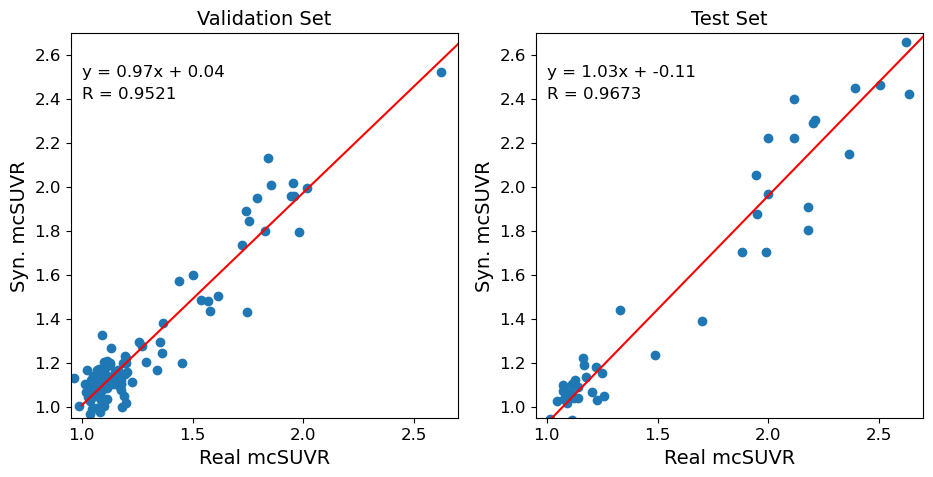

In [31]:
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

fix, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].scatter(REAL_MCSUVR_B_VAL, FAKE_MCSUVR_B_val)
axs[0].set_title("Validation Set", fontsize=14)
axs[0].set_xlabel("Real mcSUVR", fontsize=14)
axs[0].set_ylabel("Syn. mcSUVR", fontsize=14)
axs[0].set_xlim(0.95, 2.7)
axs[0].set_ylim(0.95, 2.7)

axs[1].scatter(REAL_MCSUVR_B_TEST, FAKE_MCSUVR_B_TEST)
axs[1].set_title("Test Set", fontsize=14)
axs[1].set_xlabel("Real mcSUVR", fontsize=14)
axs[1].set_ylabel("Syn. mcSUVR", fontsize=14)
axs[1].set_xlim(0.95, 2.7)
axs[1].set_ylim(0.95, 2.7)

# fit a line to the data
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(REAL_MCSUVR_B_VAL.reshape(-1, 1), FAKE_MCSUVR_B_val.reshape(-1, 1))
r_sq = model.score(REAL_MCSUVR_B_VAL.reshape(-1, 1), FAKE_MCSUVR_B_val.reshape(-1, 1))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
x = np.linspace(1, 2.7, 100)
y = model.coef_[0] * x + model.intercept_
axs[0].plot(x, y, color='red')
# write done the equation of the plot on the upper left
axs[0].text(1, 2.5, f"y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}", fontsize=12)
axs[0].text(1, 2.4, f"R = 0.9521", fontsize=12)

model = LinearRegression()
model.fit(REAL_MCSUVR_B_TEST.reshape(-1, 1), FAKE_MCSUVR_B_TEST.reshape(-1, 1))
r_sq = model.score(REAL_MCSUVR_B_TEST.reshape(-1, 1), FAKE_MCSUVR_B_TEST.reshape(-1, 1))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
x = np.linspace(1, 2.7, 100)
y = model.coef_[0] * x + model.intercept_
axs[1].plot(x, y, color='red')
axs[1].text(1, 2.5, f"y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}", fontsize=12)
axs[1].text(1, 2.4, f"R = 0.9673", fontsize=12)

# plt.savefig("mcSUVR_correlation_CL.png", dpi=300)


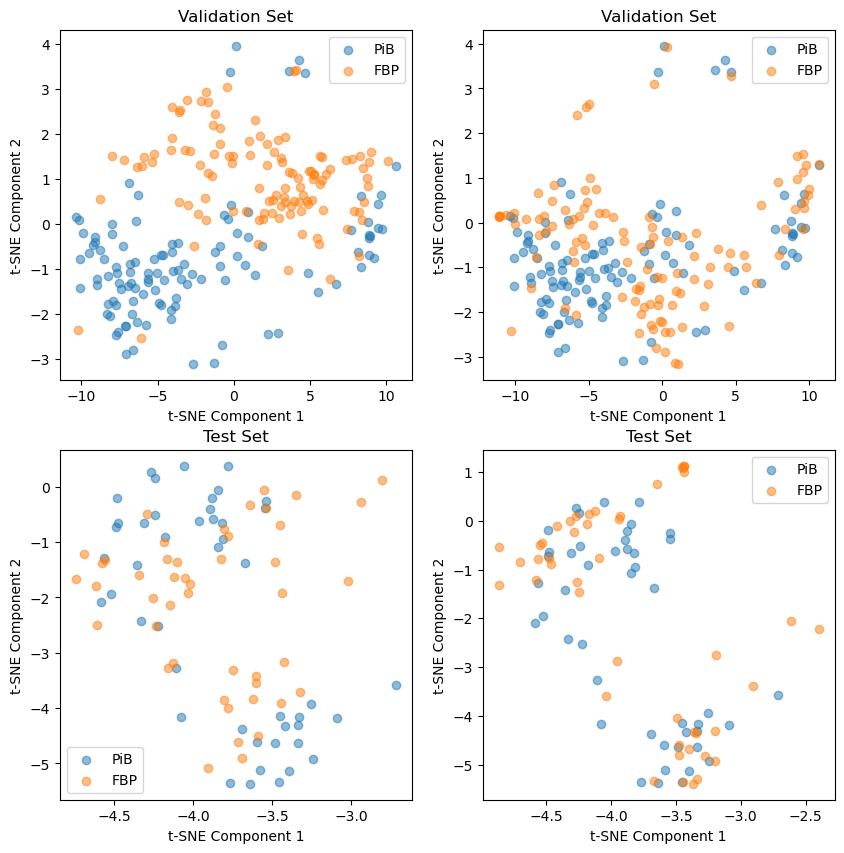

In [3]:
# Do TSNE and PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# try UMAP
import umap
reducer = umap.UMAP()
reducer.fit(StandardScaler().fit_transform(paired_val[1].cpu().numpy()))

def plot_tsne(real, fake, ax, **kwargs):
    
    concat = torch.cat([real, fake], dim=0).cpu().numpy()
    concat = StandardScaler().fit_transform(concat)
    
    # tsne = PCA(n_components=2).fit_transform(
    #     concat
    # )
    tsne = TSNE(n_components=3, perplexity=40, n_iter=500).fit_transform(
        concat
    )
    # reducer = umap.UMAP()
    # tsne = reducer.fit_transform(concat)
    
    ax.scatter(tsne[:len(real), 0], tsne[:len(real), 1], label=kwargs['label1'], alpha=0.5)
    ax.scatter(tsne[len(real):, 0], tsne[len(real):, 1], label=kwargs['label2'], alpha=0.5)
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    ax.legend()
    ax.set_title(kwargs['title'])
    
    # draw 3D
    # ax.scatter(tsne[:len(real), 0], tsne[:len(real), 1], tsne[:len(real), 2], label=kwargs['label1'], alpha=0.5)
    # ax.scatter(tsne[len(real):, 0], tsne[len(real):, 1], tsne[len(real):, 2], label=kwargs['label2'], alpha=0.5)
    # ax.set_xlabel("t-SNE Component 1")
    # ax.set_ylabel("t-SNE Component 2")
    # ax.set_zlabel("t-SNE Component 3")
    # ax.legend()
    # ax.set_title(kwargs['title'])
    
def plot_tsne2(real, fake1, fake2, ax1, ax2, **kwargs):
    
    n_real, n_fake1, n_fake2 = len(real), len(fake1), len(fake2)
    concat = torch.cat([real, fake1, fake2], dim=0).cpu().numpy()
    concat = StandardScaler().fit_transform(concat)
    
    # tsne = PCA(n_components=2).fit_transform(
    #     concat
    # )
    tsne = TSNE(n_components=2, perplexity=80, n_iter=2000).fit_transform(
        concat
    )
    # reducer = umap.UMAP()
    # tsne = reducer.fit_transform(concat)
    
    ax1.scatter(tsne[:n_real, 0], tsne[:n_real, 1], label=kwargs['label1'], alpha=0.5)
    ax1.scatter(tsne[n_real:n_real+n_fake1, 0], tsne[n_real:n_real+n_fake1, 1], label=kwargs['label2'], alpha=0.5)
    ax1.set_xlabel("t-SNE Component 1")
    ax1.set_ylabel("t-SNE Component 2")
    ax1.legend()
    ax1.set_title(kwargs['title'])
    
    ax2.scatter(tsne[:n_real, 0], tsne[:n_real, 1], label=kwargs['label1'], alpha=0.5)
    ax2.scatter(tsne[n_real+n_fake1:, 0], tsne[n_real+n_fake1:, 1], label=kwargs['label2'], alpha=0.5)
    ax2.set_xlabel("t-SNE Component 1")
    ax2.set_ylabel("t-SNE Component 2")
    ax2.legend()
    ax2.set_title(kwargs['title'])
    
    # draw 3D
    # ax1.scatter(tsne[:n_real, 0], tsne[:n_real, 1], label=kwargs['label1'], alpha=0.5)
    # ax1.scatter(tsne[n_real:n_real+n_fake1, 0], tsne[n_real:n_real+n_fake1, 1], label=kwargs['label2'], alpha=0.5)
    # ax1.set_xlabel("t-SNE Component 1")
    # ax1.set_ylabel("t-SNE Component 2")
    # ax1.set_zlabel("t-SNE Component 3")
    # ax1.legend()
    # ax1.set_title(kwargs['title'])
    
    # ax2.scatter(tsne[:n_real, 0], tsne[:n_real, 1], label=kwargs['label1'], alpha=0.5)
    # ax2.scatter(tsne[n_real+n_fake1:, 0], tsne[n_real+n_fake1:, 1], label=kwargs['label2'], alpha=0.5)
    # ax2.set_xlabel("t-SNE Component 1")
    # ax2.set_ylabel("t-SNE Component 2")
    # ax2.set_zlabel("t-SNE Component 3")
    # ax2.legend()
    # ax2.set_title(kwargs['title'])
    
    
# fig = plt.figure(figsize=(10, 10))
# ax1 = fig.add_subplot(221, projection='3d')
# ax1.view_init(45, 75)
# ax2 = fig.add_subplot(222, projection='3d')
# ax2.view_init(45, 75)
# plot_tsne2(paired_val[1], paired_val[0], fake_B_val, ax1, ax2, label1="PiB", label2="FBP", label3="Syn. PiB", title="Validation Set")

# ax3 = fig.add_subplot(223, projection='3d')
# ax3.view_init(30, 60)
# ax4 = fig.add_subplot(224, projection='3d')
# ax4.view_init(30, 60)
# plot_tsne2(paired_test[1].detach(), paired_test[0].detach(), fake_B_test.detach(), ax3, ax4, label1="PiB", label2="FBP", label3="Syn. PiB", title="Test Set")


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plot_tsne2(paired_val[1], paired_val[0], fake_B_val, axs[0, 0], axs[0, 1], label1="PiB", label2="FBP", label3="Syn. PiB", title="Validation Set")
plot_tsne2(paired_test[1].detach(), paired_test[0].detach(), fake_B_test.detach(), axs[1, 0], axs[1, 1], label1="PiB", label2="FBP", label3="Syn. PiB", title="Test Set")

# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# plot_tsne(paired_val[1], paired_val[0], axs[0, 0], label1="PiB", label2="FBP", label3="Syn. PiB", title="Validation Set")
# plot_tsne(paired_val[1], fake_B_val, axs[0, 1], label1="PiB", label2="Syn. PiB", title="Validation Set")
# plot_tsne(paired_test[1].detach(), paired_test[0].detach(), axs[1, 0], label1="PiB", label2="FBP", label3="Syn. PiB", title="Test Set")
# plot_tsne(paired_test[1].detach(), fake_B_test.detach(), axs[1, 1], label1="PiB", label2="Syn. PiB", title="Test Set")

# # call the function
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(221, projection='3d')
# ax.view_init(45, 75)
# plot_tsne(paired_val[1], paired_val[0], ax, label1="PiB", label2="FBP", title="Validation Set")

# ax = fig.add_subplot(222, projection='3d')
# ax.view_init(45, 75)
# plot_tsne(paired_val[1], fake_B_val, ax, label1="PiB", label2="Syn. PiB", title="Validation Set")

# ax = fig.add_subplot(223, projection='3d')
# ax.view_init(30, 60)
# plot_tsne(paired_test[1].detach(), paired_test[0].detach(), ax, label1="PiB", label2="FBP", title="Test Set")

# ax = fig.add_subplot(224, projection='3d')
# ax.view_init(30, 60)
# plot_tsne(paired_test[1].detach(), fake_B_test.detach(), ax, label1="PiB", label2="Syn. PiB", title="Test Set")




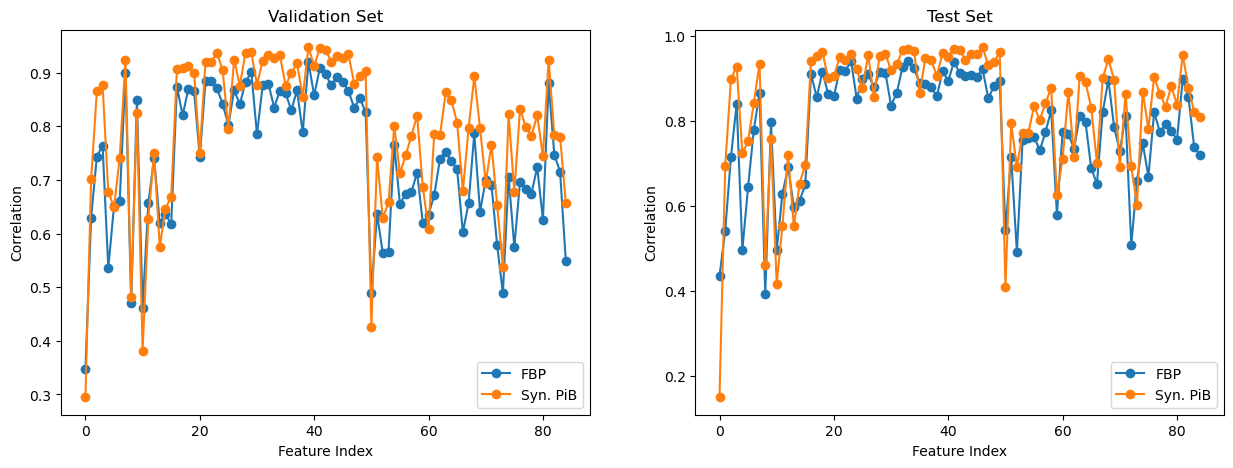

In [16]:
# single variable analysis
import matplotlib.pyplot as plt
# abs difference
diff_real_test = torch.abs( (paired_test[1].detach() - paired_test[0].detach()) / (paired_test[1].detach() + 1e-8) ).mean(dim=0)
diff_pred_test = torch.abs( (paired_test[1].detach() - fake_B_test.detach()) / (paired_test[1].detach() + 1e-8) ).mean(dim=0)
diff_real_val = torch.abs( (paired_val[1] - paired_val[0]) / (paired_val[1] + 1e-8) ).mean(dim=0)
diff_pred_val = torch.abs( (paired_val[1] - fake_B_val) / (paired_val[1] + 1e-8) ).mean(dim=0)

# correlation
cor_real_test = torch.tensor([cal_correlation(paired_test[1][:, i].cpu().numpy(), paired_test[0][:, i].cpu().numpy()) for i in range(85)])
cor_pred_test = torch.tensor([cal_correlation(paired_test[1][:, i].cpu().numpy(), fake_B_test[:, i].cpu().numpy()) for i in range(85)])
cor_real_val = torch.tensor([cal_correlation(paired_val[1][:, i].cpu().numpy(), paired_val[0][:, i].cpu().numpy()) for i in range(85)])
cor_pred_val = torch.tensor([cal_correlation(paired_val[1][:, i].cpu().numpy(), fake_B_val[:, i].cpu().numpy()) for i in range(85)])


# fig, axs = plt.subplots(1, 2, figsize=(20, 5))
# axs[0].plot(diff_real_val.cpu().numpy()[:85], label="Real")
# axs[0].plot(diff_pred_val.cpu().numpy()[:85], label="Syn.")
# axs[0].set_title("Validation Set")
# axs[0].legend()

# axs[1].plot(diff_real_test.cpu().numpy()[:85], label="Real")
# axs[1].plot(diff_pred_test.cpu().numpy()[:85], label="Syn.")
# axs[1].set_title("Test Set")
# axs[1].legend()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(cor_real_val.cpu().numpy()[:85], label="FBP", marker='o')
axs[0].plot(cor_pred_val.cpu().numpy()[:85], label="Syn. PiB", marker='o')
axs[0].set_title("Validation Set")
axs[0].set_xlabel("Feature Index")
axs[0].set_ylabel("Correlation")
axs[0].legend()

axs[1].plot(cor_real_test.cpu().numpy()[:85], label="FBP", marker='o')
axs[1].plot(cor_pred_test.cpu().numpy()[:85], label="Syn. PiB", marker='o')
axs[1].set_title("Test Set")
axs[1].set_xlabel("Feature Index")
axs[1].set_ylabel("Correlation")
axs[1].legend()




# Classification between real and fake 

In [44]:
import torch
import torch.nn as nn
torch.manual_seed(0)  # For reproducibility
class classifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        last = self.fc2(x)
        x = self.fc3(last)
        x = self.sigmoid(x)
        return x, last
    
# train a classifier
# prepare data
X_train = torch.cat([paired_val[0], paired_val[1]], dim=0)
y_train = torch.cat([torch.ones(len(paired_val[0])), torch.zeros(len(paired_val[1]))], dim=0)
X_test = torch.cat([paired_test[0], paired_test[1]], dim=0)
y_test = torch.cat([torch.ones(len(paired_test[0])), torch.zeros(len(paired_test[1]))], dim=0)

# shuffle
perm = torch.randperm(len(X_train))
X_train = X_train[perm]
y_train = y_train[perm]

# train
clf = classifier(86, 100, 1)
criterion = nn.BCELoss()
optimizer = optim.AdamW(clf.parameters(), lr=0.0005)
n_epoch = 1000
acc_best = 0
for epoch in range(n_epoch):
    optimizer.zero_grad()
    output, last_val = clf(X_train)
    loss = criterion(output.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    if epoch % 1 == 0:
        # print(f"Epoch {epoch}, Loss: {loss.item()}")
        output_train = (output.squeeze() > 0.5) == y_train
        acc_train = torch.mean(output_train.float()).item()

        output_test, last_test = clf(X_test)
        acc_test = torch.mean(((output_test.squeeze() > 0.5) == y_test).float()).item()
        if acc_test > acc_best:
            acc_best = acc_test
            best_model = clf

print(f"Train Acc: {acc_train}, Test Acc: {acc_best}")





Train Acc: 1.0, Test Acc: 0.8260869383811951


Text(0.5, 1.0, 't-SNE of the Last Layer of Classifier')

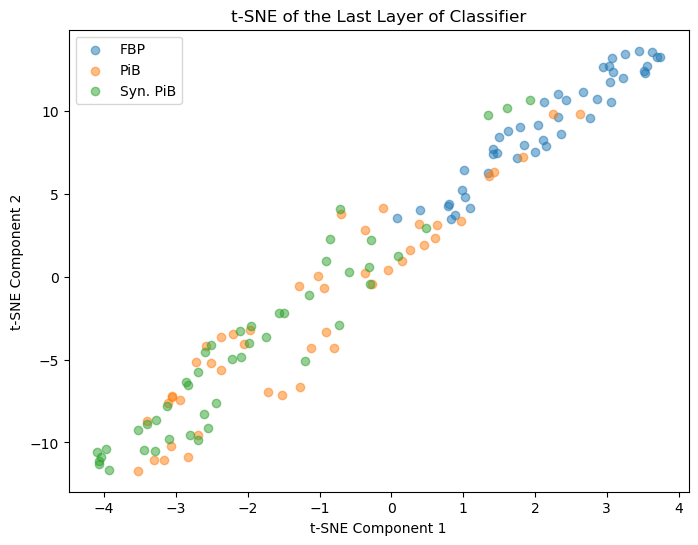

In [42]:
# TSNE of the last layer and visualize
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X_new = torch.cat([paired_test[0], paired_test[1], fake_B_test], dim=0)
_, last_new = best_model(X_new)
# prepare data
X = StandardScaler().fit_transform(last_new.cpu().detach().numpy())

# tsne
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, random_state=0).fit_transform(X)

# plot
plt.figure(figsize=(8, 6))
plt.scatter(tsne[:46, 0], tsne[:46, 1], label="FBP", alpha=0.5)
plt.scatter(tsne[46:92, 0], tsne[46:92, 1], label="PiB", alpha=0.5)
plt.scatter(tsne[92:, 0], tsne[92:, 1], label="Syn. PiB", alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.title("t-SNE of the Last Layer of Classifier")

In [ ]:
from scipy.stats import ks_2samp, ttest_ind

count_t = 0
count_ks = 0
for i in range(85):
    print(f'feature {i}')
    ttest = ttest_ind(paired_val_FBP[:, i].cpu().numpy(), paired_test_FBP[:, i].cpu().numpy())
    ks = ks_2samp(paired_val_FBP[:, i].cpu().numpy(), paired_test_FBP[:, i].cpu().numpy())
    if ttest.pvalue < 0.05:
        print(f'test statistic = {ttest.statistic}, pvalue = {ttest.pvalue}')
        count_t += 1
        
    if ks.pvalue < 0.05:
        print(f'statistic = {ks.statistic}, pvalue = {ks.pvalue}')
        count_ks += 1
    
    
